#E-news Express


## Define Problem Statement and Objectives

**Business Context**

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

**Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:


1.    Do the users spend more time on the new landing page than on the existing 
landing page?
2.    Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3.    Does the converted status depend on the preferred language?
4.    Is the time spent on the new page the same for the different language users?
 

**Data Dictionary**

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# Let's import the dataframe
df = pd.read_csv("/gdrive/My Drive/MGL/EnewsExpress/abtest.csv")

In [ ]:
# First, let's perform some basic EDA to better understand our dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
df.shape

(100, 6)

Our dataframe has 100 rows and 6 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
# Let's check for missing values
print(df.isna().sum())

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64


In [ ]:
# Is there any duplicate data?
print(df.duplicated().sum())

0


## Insights
*    Our dataframe has one float, one integer, and 4 object columns
*    We have no missing data in our dataframe
*    We have no duplicate data




In [ ]:
# Let's look at the statistical information of our numerical values
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


## Insights
*    The mean and median are relatively close for time spent on the page, we can assume it is normally distributed.
*    The standard deviation is 2.38 minutes
*    the minimum amount of time is .19 minutes, and the maximum time is 10.71 minutes

In [ ]:
# Now let's look at the statistical information of our categorical data
df.describe(include='object')

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


In [ ]:
# What are the unique values in our dataframe?
# list of columns to exclude
exclude_cols = ['user_id', 'time_spent_on_the_page']

# get the unique values in each column
for col in df.columns:
    if col not in exclude_cols:
        unique_vals = df[col].unique()
        print(f'Unique values in {col}: {unique_vals}')

Unique values in group: ['control' 'treatment']
Unique values in landing_page: ['old' 'new']
Unique values in converted: ['no' 'yes']
Unique values in language_preferred: ['Spanish' 'English' 'French']


In [ ]:
# How often do these values appear?
print(df['group'].value_counts())
print('---------------------------------------------------------')
print(df['landing_page'].value_counts())
print('---------------------------------------------------------')
print(df['converted'].value_counts())
print('---------------------------------------------------------')
print(df['language_preferred'].value_counts())

control      50
treatment    50
Name: group, dtype: int64
---------------------------------------------------------
old    50
new    50
Name: landing_page, dtype: int64
---------------------------------------------------------
yes    54
no     46
Name: converted, dtype: int64
---------------------------------------------------------
Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64


## Insights
*    The control group is split evenly, 50 in control and 50 in treatment.
*    Likewise, the users that saw the old landing page arer equal to those that saw the new landing page.
*    Slightly more than half of all users were converted to paying members.
*    French and Spanish are equally slightly more pouplar languages than English.

### Univariate Analysis

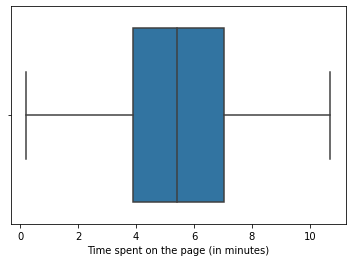

In [ ]:
# First let's look at our data on the time spent on the page
sns.boxplot(data=df,x ='time_spent_on_the_page')
plt.xlabel('Time spent on the page (in minutes)')
plt.show()

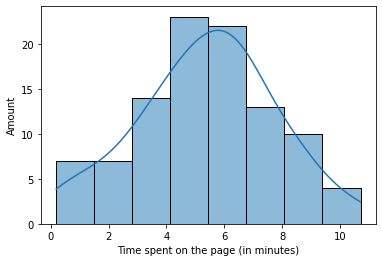

In [ ]:
# Continue visualizing data using a hist plot
sns.histplot(data=df,x='time_spent_on_the_page', kde=True)
plt.xlabel('Time spent on the page (in minutes)')
plt.ylabel('Amount')
plt.show()

## Insights
*    There are no outliers recorded in the data set for the amount of time spent on the page
*    The spread is roughly normally distributed
*    The most common amount of time spent on the page was between 4 and 7 minutes

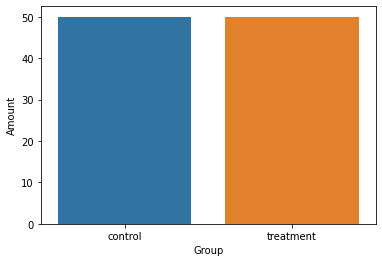

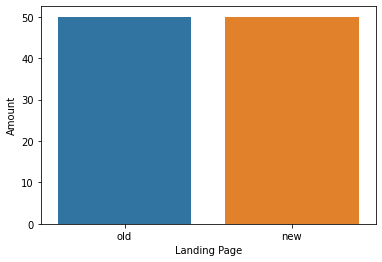

In [ ]:
# We have already determined above that the amount of control tests are equal to the treatment tests.
# We have also discovered this for the landing page type, but let's visualize this data
sns.countplot(data=df,x='group')
plt.xlabel('Group')
plt.ylabel('Amount')
plt.show()
sns.countplot(data=df,x='landing_page')
plt.xlabel('Landing Page')
plt.ylabel('Amount')
plt.show()

## Insights
*    Here we are able to confirm we are evenly distributed betwen our A/B test sizes

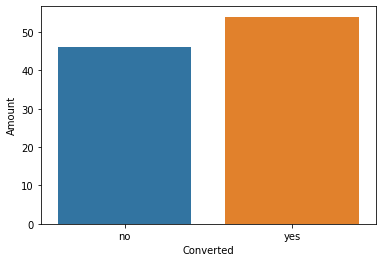

In [ ]:
# Now let's take a look at our conversion numbers
sns.countplot(data=df,x='converted')
plt.xlabel('Converted')
plt.ylabel('Amount')
plt.show()

## Insights
*    As we can see above, our conversion rate is just over half.
*    We can conclude that through our test ing, regaardless of A/B, more than half of our customers became subscribers in the sample.

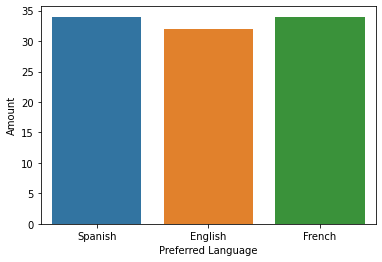

In [ ]:
# How about language? Let's visualize our customer's language preference
sns.countplot(data=df,x='language_preferred')
plt.xlabel('Preferred Language')
plt.ylabel('Amount')
plt.show()

## Insights
*    As we can see above, the three language options were about evenly distributed among customers.
*    Spanish and French were tied as most slected, with English just behind them.

### Bivariate Analysis

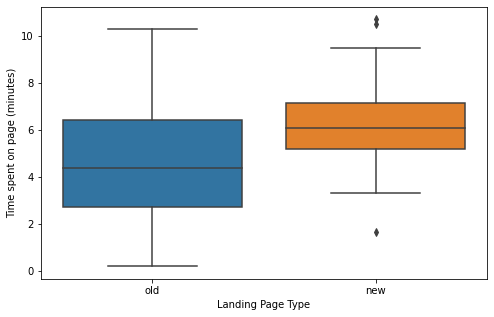

In [ ]:
# Now we can start to compare our data to try and draw more insight
# Firswt let's look at how long users spent on both the old and new landing pages
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.xlabel('Landing Page Type')
plt.ylabel('Time spent on page (minutes)')
plt.show()

## Insights
*    There is a much wider range of time spent by users on the old landing page compared to the new landing page.
*    The median of time spent on the new page is almost two minutes more than that of the old page.
*    There are a few outliers in the data for the new landing page, showing the amount of time spent has a much smaller range.
*    The upper and lower quartile on the old landing page is roughly twice as much compared to time spent on the new page.

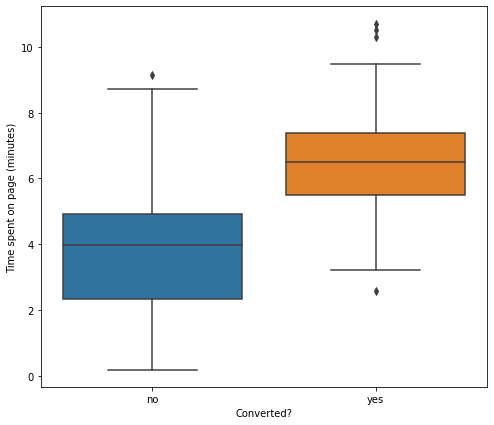

In [ ]:
# We can now look at our conversions rates with the time users spent on a page
# Will our data show a difference on whether time spent on a page impacted their likelyhood to subscribe?
plt.figure(figsize=(8,7))
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
plt.xlabel('Converted?')
plt.ylabel('Time spent on page (minutes)')
plt.show()

## Insights
*    The amount of time users spent on a page varied much more for users not converted compared to those that were.
*    On average, converted users spent much more time on the page.
*    In our sample, converted users spent at least 2 minutes on the page.

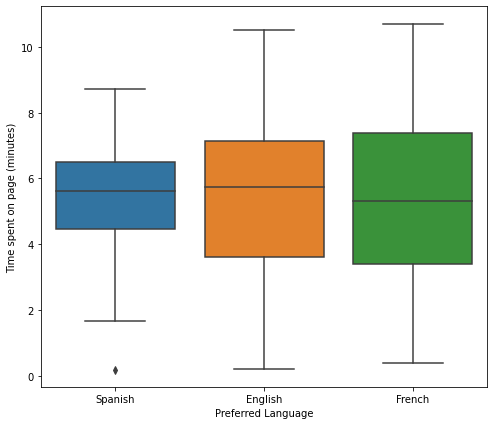

In [ ]:
# Does language preference impace how long a user stays on the page?
plt.figure(figsize=(8,7))
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.xlabel('Preferred Language')
plt.ylabel('Time spent on page (minutes)')
plt.show()

## Insights
*    The amount of time spent on the page is roughly even between French and English users.
*    Spanish speaking users spent a much smaller range of time on the page.
*    The average amount of time spent of the page is roughly even across all three languages offered.

## Conclusions
*    Users spend much more time on average with the new page.
*    The more time a user spent on a page, the more likely they would convert to a subscriber.
*    Language preference does not seem to impact time spent on the page.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

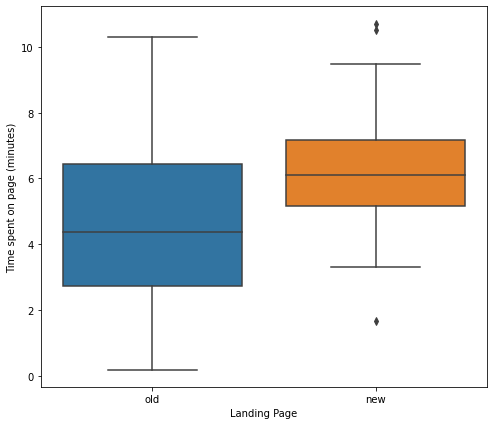

In [ ]:
# Let's visualize whether or not users spent more time on the new page compared to the old page
plt.figure(figsize=(8,7))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.xlabel('Landing Page')
plt.ylabel('Time spent on page (minutes)')
plt.show()

## Insights
*    The range of time people spent on the old landing page was much greater than that of the new page.
*    There are no outliers for the old page, while the new page does have outliers on both sides.
*    The median amount of time spent on the new page appears to be greater than that of the old page.

### Step 1: Define the null and alternate hypotheses

$H_0$: Users spent the same amount of time or less on the new page compared to the old page

$H_a$: Users spent more time on the new page compared to the old page.


### Step 2: Select Appropriate test

We have a hypothesis concerning one tail with two independent populations. Given that we don't know the standard deviation for the population, we can use the **two sample independent T-test.**

### Step 3: Decide the significance level

Our problem statment has given us a signicance level of 5%. 

$\alpha = 0.05$.

### Step 4: Collect and prepare data

In [ ]:
# First we need to subset our data so we can work with the specific values related to our hypothesis: time spent on the new page and time spent on the old page
new_time = df[df['landing_page'] == 'new']['time_spent_on_the_page']

old_time = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [ ]:
#Let's check the standard deviation for our new data subsets
print(new_time.std())
print(old_time.std())

1.8170310387878263
2.581974849306046


The standard deviation for time spent on the new page is 1.82 minutes, and 2.58 minutes on the old page.

### Step 5: Calculate the p-value

In [ ]:
# Since this is a two sample t test, let's import the function from scipy
from scipy.stats import ttest_ind

# Find the p-value
test_stat, p_value = ttest_ind(new_time, old_time, equal_var=True, alternative='greater')
print(p_value)

0.0001316123528095005


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Let's code a function to print a statement on our hypothesis depending on our p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001316123528095005 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

## Conclusions
*    Our p-value is below the level of signifance, so we can confidently reject the null hypothesis.
*    This means users spend, on average, more time on the new landing page.
*    Our new landing page is more effective at keeping the attention of users.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

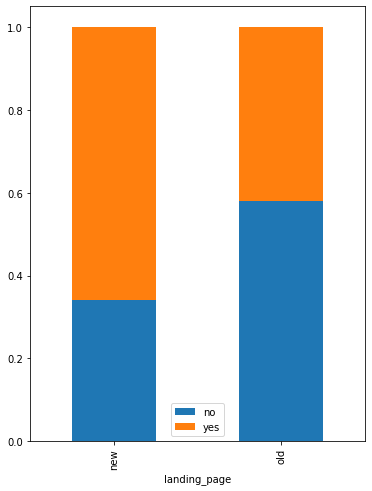

In [ ]:
# First we need to visualize our data
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

## Insights

*    After looking at the graph, we can see that more users were compared on the new page compared to the old page. But is that statisically accurate?

## Hypothesis

$H_0:$ Conversion rate on the new page is equal to that of the old page

$H_a:$ Conversion rate on the new page is greater than that of the new page

We have a hypothesis concerning one tail with two independent proportions. Given that we knbow the standard deviation we can use the **one sample proportions Z-test.**

Our problem statment has given us a signicance level of 5%. 

$\alpha = 0.05$.

In [ ]:
# Like before, we need to subset our data so we can work with the specific values related to our hypothesis
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] 

In [ ]:
# Now that we have our value counts, let's assign them to a variable
control = df.group.value_counts()['control'] 
treatment = df.group.value_counts()['treatment'] 
print('There are', control, 'users viewing the old page, and', treatment, 'users viewing the new page.')

There are 50 users viewing the old page, and 50 users viewing the new page.


In [ ]:
# Let's import our code and calculate our p-value
from statsmodels.stats.proportion import proportions_ztest   
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [treatment, control], alternative ='larger')   

print('The p-value is', p_value)

The p-value is 0.008026308204056278


In [ ]:
# Let's code a function to print a statement on our hypothesis depending on our p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


## Insights

*    The p-value is below our level of significance, so we reject the null hypothesis.
*    Stats provide clear evidence that users are morel ikely to convert on the new page compared to the old page.

## 3. Is the conversion and preferred language are independent or related?

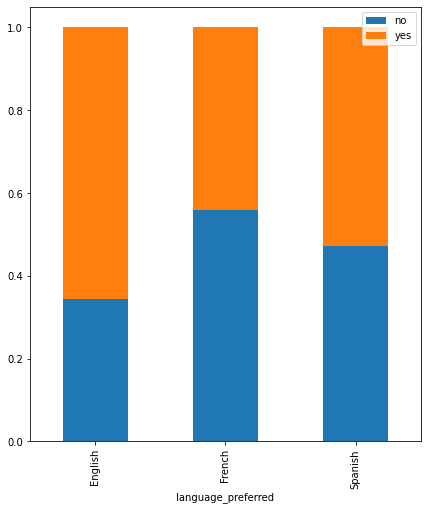

In [ ]:
# As before, let's visualize the data we are taking a look at specifically
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(7,8), stacked=True)
plt.legend()
plt.show()

## Insights

*    Based on our graph, more than half of users for Spanish and English are converted users.
*    French is the opposite of this trend, with half of users not converting.
*    Is there statistical evidence to show that language preference impacts conversion?

## Hypothesis

$H_0:$ Conversion rate is the equal for all languages

$H_a:$ Conversion rate is not equal for all languages

With the values involved, we need to test independence between them. For this we can use the **Chi-squared test of independence.**

Our problem statment has given us a signicance level of 5%. 

$\alpha = 0.05$.

In [ ]:
# Let's start by preparing our data to perform the correct tests
lang_table = pd.crosstab(df['converted'], df['language_preferred'])  

lang_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [ ]:
# SciPy has the correct test we are looking for, let's import it
from scipy.stats import chi2_contingency  

# Now we can run the test to determine our p-value
chi2, p_value, dof, exp_freq = chi2_contingency(lang_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


In [ ]:
# Let's code a function to print a statement on our hypothesis depending on our p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


## Insights

*    While it initially looked like language preference in the graph, our statistics show that is not the case.
*    Our p-value is much higher than our alpha, so we failed to reject the null hypothesis.
*    Thus we can say that language does not affect conversion rate.

## 4. Is the time spent on the new page same for the different language users?

In [ ]:
# As always let's visualize our data concering this question
# Let's create another data frame subset with users who were given the new page
new_language = df[df['landing_page'] == 'new']
new_language.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


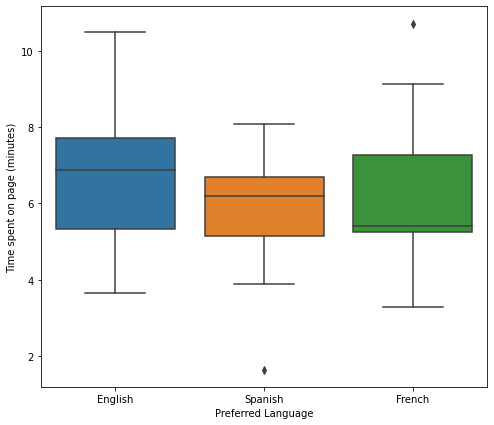

In [ ]:
# Now we can create our graph, this time using a boxplot
plt.figure(figsize=(8,7))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', data = new_language)
plt.xlabel('Preferred Language')
plt.ylabel('Time spent on page (minutes)')
plt.show();

## Insights

*    While the median differs slightly between languages, no language visually appears to spend more or less time on the page compared to each other.
*    There are a couple outliers in or data.

## Hypothesis

$H_0:$ Time spent on the new page is the equal for all languages

$H_a:$ Time spent on the new page is not equal for all languages

Our hypothesis involves looking at the mean (average) of three seperate populations. Given this information, we should use the **ANOVA test.**

Our problem statment has given us a signicance level of 5%. 

$\alpha = 0.05$.

In [ ]:
# Before we can calculate our p-value, we need to get our data in order
# Since this is a test of means, we need to get the mean values
new_language.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

In [ ]:
# To properly run our test, we need to subset each data set
english_time = new_language[new_language['language_preferred']=='English']['time_spent_on_the_page']
spanish_time = new_language[new_language['language_preferred']=='Spanish']['time_spent_on_the_page']
french_time = new_language[new_language['language_preferred']=='French']['time_spent_on_the_page']

In [ ]:
# Before we can run the ANOVA test, we need to test for normality
# Let's import and run the Shapiro test from scipy for this
from scipy import stats

w, p_value = stats.shapiro(df['time_spent_on_the_page'])
print('The p value is ', p_value)

The p value is  0.5643193125724792


*    The Shapiro test passed, so we can assume normality.

In [ ]:
# Now we should test for variance with the levene test
# As before, let's import the required functionality
from scipy.stats import levene

# Now we can run the test
statistic, p_value = stats.levene(english_time, spanish_time, french_time) 

# Let's check our data
print('The p value is ', p_value)

The p value is  0.46711357711340173


*    Our data has passed both the Shapiro and Levene tests, so now we can run our ANOVA test.

In [ ]:
# We can use the ANOVA test here, f_oneway
from scipy.stats import f_oneway 
test_stat, p_value = f_oneway(english_time, spanish_time, french_time)   
print('The p-value is', p_value)

The p-value is 0.43204138694325955


In [ ]:
# Let's code a function to print a statement on our hypothesis depending on our p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


## Insights

*    While a glance at the data may show the means are different, we cannot statiscally say they are.
*    Our p-value is far higher than our alpha so we failed to reject our null hypothesis.

# Conclusion and Business Recommendations

# Conclusions

*    Our data concludes that users spend more time on the new landing page.
*    Data also shows a trend that the longer a user spends time on the page, the more leikely they will become a converted user.
*    Furthermore, the new landing page keeps users on it long and is statiscally more effective at converting users.
*    Language preference is not a determining factor for conversion.
*    Language preference does not impact the mean time spent on the new page.

# Recommendations
*    The new page performs better at keeping users on the page as well as conversion. I recommend the company adopt the new page going forward.
*    Language preference does not impact conversions or time on the page, I would recommend not changing anything in this regard.
*    Given the success of the new landing page, I could also recommend sitewide changes to match the new landing page( ie., design, aesthetic, etc.)


___